## Assignment 1 (3 scores):

- Use the Numpy library only to construct the Linear Regression model.
- Train and Evaluate that Linear Regression model on the [Forest Fires](https://archive.ics.uci.edu/static/public/162/forest+fires.zip) dataset.

### Import Libraries

In [98]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Load Dataset 

In [159]:
df = pd.read_csv("./dataset/forestfires.csv")

# view dataset 
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### Exploratory Data Analysis

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [4]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [5]:
# check NaN & Null value
for col_name in df.columns: 
    print("Total NaN: ", df[col_name].isna().sum())
    print("Totol Null: ", df[col_name].isnull().sum())
    print("Data type: ", df[col_name].dtype)
    print("-" * 10)

Total NaN:  0
Totol Null:  0
Data type:  int64
----------
Total NaN:  0
Totol Null:  0
Data type:  int64
----------
Total NaN:  0
Totol Null:  0
Data type:  object
----------
Total NaN:  0
Totol Null:  0
Data type:  object
----------
Total NaN:  0
Totol Null:  0
Data type:  float64
----------
Total NaN:  0
Totol Null:  0
Data type:  float64
----------
Total NaN:  0
Totol Null:  0
Data type:  float64
----------
Total NaN:  0
Totol Null:  0
Data type:  float64
----------
Total NaN:  0
Totol Null:  0
Data type:  float64
----------
Total NaN:  0
Totol Null:  0
Data type:  int64
----------
Total NaN:  0
Totol Null:  0
Data type:  float64
----------
Total NaN:  0
Totol Null:  0
Data type:  float64
----------
Total NaN:  0
Totol Null:  0
Data type:  float64
----------


### Data Preprocessing

Xử lý cột `"month"` và cột `"day"` : chuyển dữ liệu từ chuỗi sang số

In [122]:
# Xây dựng hàm xử lý

def convert_month(month: str) -> int: 
    month_map = {
        "jan" : 1, "feb" : 2, "mar" : 3, "apr" : 4, 
        "may" : 5, "jun" : 6, "jul" : 7, "aug" : 8, 
        "sep" : 9, "oct" : 10, "nov" : 11, "dec" : 12
    }
    
    return month_map.get(month, None)


def convert_day(day: str) -> int: 
    day_map = {
        "sun" : 1, "mon" : 2, "tue" : 3, "wed" : 4, 
        "thu" : 5, "fri" : 6, "sat" : 7, 
    }

    return day_map.get(day, None)

In [123]:
# Áp dụng hàm xử lý lên dataframe

df["month"] = df["month"].apply(convert_month)
df["day"] = df["day"].apply(convert_day)

# Note: Gọi hàm xử lý là f, dữ liệu ở cột cần áp dụng là x, hàm apply sẽ chuyển x -> f(x)

In [124]:
# Check var
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### Split Data

In [125]:
def split_data(df): 
    # Chia X, y và chuyển từ pandas series về numpy array
    # X là features và y là label
    X = df.drop(columns="area").to_numpy(dtype=float)
    y = df["area"].to_numpy(dtype=float)
    
    # Xáo trộn mảng
    np.random.seed(42)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    X_shuffled = X[indices]
    y_shuffled = y[indices]
    
    # Chia tập train, tập test
    split_ratio = 0.8
    split_index = int(X_shuffled.shape[0] * split_ratio)

    X_train, X_test = X_shuffled[:split_index], X_shuffled[split_index:]
    y_train, y_test = y_shuffled[:split_index], y_shuffled[split_index:]
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = split_data(df)

Lý do chọn seed là 42 [reference](https://medium.com/geekculture/the-story-behind-random-seed-42-in-machine-learning-b838c4ac290a) :D

### Model Building

Xây dựng model Linear Regression với: 
- `rmse`: dùng để đánh giá giá trị dự đoán so với giá trị thật
- `fit`: dùng để tìm bộ tham số cho mô hình
- `predict`: dùng để dự đoán

In [196]:
class LinearRegression: 
    def rmse(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        eps = y - y_hat 
        error = np.sqrt(np.mean(eps**2)) 
        return error
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None: 
        # X = np.c_[np.ones(X.shape[0]), X]
        self.theta_ = np.linalg.inv(X.T @ X) @ (X.T @ y)
        
    def predict(self, X: np.ndarray) -> np.ndarray: 
        # X = np.c_[np.ones(X.shape[0]), X]
        y_pred = X @ self.theta_
        return y_pred

In [128]:
lr = LinearRegression()

### Model Training 

In [129]:
lr.fit(X_train.astype(float), y_train.astype(float))

In [130]:
# tham số của mô hình sau khi train
lr.theta_

array([ 2.19805389, -0.32749201,  3.63690297,  1.88673003, -0.25694667,
        0.12247931, -0.04114529, -0.78520454,  0.97965232, -0.23925771,
        0.56454666, -2.48552099])

### Model Evaluation

In [131]:
y_pred = lr.predict(X_test.astype(float))

In [132]:
print(f'RMSE: { lr.rmse(y_test, y_pred) }')

RMSE: 24.5783573440693


### Visualization of Results

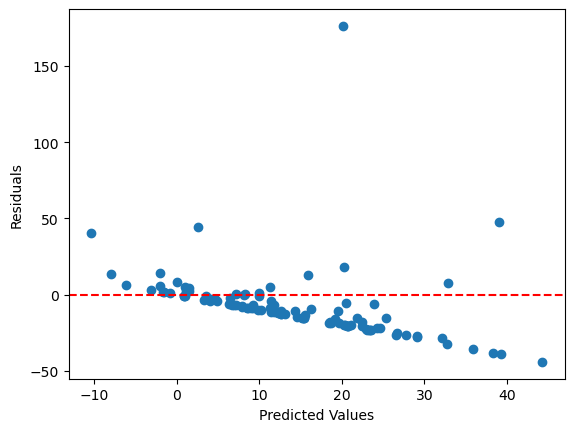

In [55]:
# Biểu đồ sai số

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

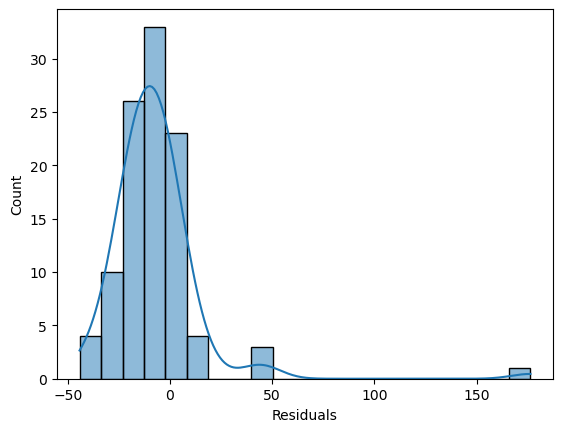

In [57]:
# Biểu đồ histogram của sai số

sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.show()

## Assignment 2 (3 scores):

- Standardize the data so that their mean is $0$ and their variance is $1$.
- Compare the results of Linear Regression model when being trained on the original and standardized data.

### Standardize

#### Reload & Preprocess Data

In [ ]:
# Reuse code in assignment 1 for data loading, preprocessing, spliting

df = pd.read_csv("./dataset/forestfires.csv")

df["month"] = df["month"].apply(convert_month)
df["day"] = df["day"].apply(convert_day)

X_train, X_test, y_train, y_test = split_data(df)

#### Standardize

Công thức:
$$
 z_i = \frac{x_i - \mu}{\sigma}
$$
- Sau khi standardize, dữ liệu sẽ có $\mu = 0$ và $\sigma^2 = 1$

In [134]:
df["FFMC"] = (df["FFMC"] - df["FFMC"].mean()) / df["FFMC"].std()
df["DMC"] = (df["DMC"] - df["DMC"].mean()) / df["DMC"].std()
df["DC"] = (df["DC"] - df["DC"].mean()) / df["DC"].std()
df["ISI"] = (df["ISI"] - df["ISI"].mean()) / df["ISI"].std()
df["temp"] = (df["temp"] - df["temp"].mean()) / df["temp"].std()
df["RH"] = (df["RH"] - df["RH"].mean()) / df["RH"].std()
df["wind"] = (df["wind"] - df["wind"].mean()) / df["wind"].std()
df["rain"] = (df["rain"] - df["rain"].mean()) / df["rain"].std()

In [114]:
# Check var
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,-0.805180,-1.322045,-1.828706,-0.860113,-1.840857,0.411326,1.497164,-0.073197,0.00
1,7,4,10,3,-0.008094,-1.178399,0.488418,-0.509195,-0.153130,-0.691786,-1.740070,-0.073197,0.00
2,7,4,10,7,-0.008094,-1.048806,0.560173,-0.509195,-0.738668,-0.691786,-1.516813,-0.073197,0.00
3,8,6,3,6,0.191177,-1.211188,-1.896429,-0.004751,-1.823636,3.230391,-0.009824,0.602572,0.00
4,8,6,3,1,-0.243597,-0.930142,-1.796859,0.126843,-1.289763,3.352959,-1.237741,-0.073197,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,-1.638496,-0.845829,0.474309,-1.561947,1.534597,-0.753070,-0.735411,-0.073197,6.44
513,2,4,8,1,-1.638496,-0.845829,0.474309,-1.561947,0.518517,1.637006,0.994835,-0.073197,54.29
514,7,4,8,1,-1.638496,-0.845829,0.474309,-1.561947,0.397965,1.575722,1.497164,-0.073197,11.16
515,1,4,8,7,0.680298,0.548471,0.269122,0.499693,1.155720,-0.140230,-0.009824,-0.073197,0.00


#### Re-evaluate the model after data standardization

In [ ]:
lr_2 = LinearRegression()

lr_2.fit(X_train.astype(float), y_train.astype(float))

y_pred_2 = lr_2.predict(X_test.astype(float))

print(f'RMSE: { lr_2.rmse(y_test, y_pred_2) }')

RMSE: 24.403434407279484


#### Compare with Baseline Model

Ở đây ta so sánh mô hình sau khi đã stadardize dữ liệu (assignment 2) với mô hình baseline (assignment 1)

In [188]:
rmse_1 = lr.rmse(y_test, y_pred)
rmse_2 = lr_2.rmse(y_test, y_pred_2)

improvement = (rmse_1 - rmse_2) / rmse_1 * 100

print(f'RMSE of Baseline Model: {rmse_1:.4f}')
print(f'RMSE of Stadardized Model: {rmse_2:.4f}')
print(f'Improvement: {improvement:.2f}%')

RMSE of Baseline Model: 24.5784
RMSE of Stadardized Model: 24.4034
Improvement: 0.71%


### Data normalization

The OLS estimator of a linear regression model has the form

$$
    \hat{\beta} = (X^T X)^{-1} X^T y
$$
where $X^T X \in \mathbb{R}^{K \times K}$ is called the normal matrix of the **Gram Matrix**.

Considering the convariance of $X$, we have

\begin{align}
    Cov(X)  & = \mathbb{E}[(X - \mathbb{E}[X])^2] \\
            & = \mathbb{E}[X^T X - 2 X^T\mathbb{E}[X] + \mathbb{E}[X]^T \mathbb{E}[X]] \\
            & = \mathbb{E}[X^T X] - 2 \mathbb{E}[X^T\mathbb{E}[X]] + \mathbb{E}[X]^T \mathbb{E}[X] \\
            & = \mathbb{E}[X^T X] - 2 \mathbb{E}[X]^T\mathbb{E}[X] + \mathbb{E}[X]^T \mathbb{E}[X] \\
            & = \mathbb{E}[X^T X] - \mathbb{E}[X]^T \mathbb{E}[X] \\
\end{align}

In case we have $\mathbb{E}[X] = 0$, then $X^T X = Cov(X)$. The normalization helps we to have the numerical stability of the input, theoretically leads to stable calculation when being applied to unseen data.

## Assignment 3 (2 scores):

- Perform feature engineering to remove columns that are linearly dependent (colinear) with other columns in the dataset.
- Evaluate the Linear Regression model when beeing trained on the original data and preprocessed data.

#### Correlation Matrix

In [171]:
# Các cột ta quan tâm để xét độ tương quan (vì đây là các cột có kiểu dữ liệu continuous)
selected_columns = ["FFMC", "DMC", "ISI", "temp", "DC", "RH", "wind", "rain"]

# Tính ma trận tương quan
corr = np.zeros((len(selected_columns), len(selected_columns)))
for i, col_i in enumerate(selected_columns):
    for j, col_j in enumerate(selected_columns):
        corr[i, j] = np.corrcoef(df[col_i].to_numpy(), df[col_j].to_numpy())[0, 1]

corr_matrix = pd.DataFrame(corr, index=selected_columns, columns=selected_columns)
print("Correlation Matrix:\n")
print(corr_matrix)

Correlation Matrix:

          FFMC       DMC       ISI      temp        DC        RH      wind  \
FFMC  1.000000  0.382619  0.531805  0.431532  0.330512 -0.300995 -0.028485   
DMC   0.382619  1.000000  0.305128  0.469594  0.682192  0.073795 -0.105342   
ISI   0.531805  0.305128  1.000000  0.394287  0.229154 -0.132517  0.106826   
temp  0.431532  0.469594  0.394287  1.000000  0.496208 -0.527390 -0.227116   
DC    0.330512  0.682192  0.229154  0.496208  1.000000 -0.039192 -0.203466   
RH   -0.300995  0.073795 -0.132517 -0.527390 -0.039192  1.000000  0.069410   
wind -0.028485 -0.105342  0.106826 -0.227116 -0.203466  0.069410  1.000000   
rain  0.056702  0.074790  0.067668  0.069491  0.035861  0.099751  0.061119   

          rain  
FFMC  0.056702  
DMC   0.074790  
ISI   0.067668  
temp  0.069491  
DC    0.035861  
RH    0.099751  
wind  0.061119  
rain  1.000000  


#### Visualization

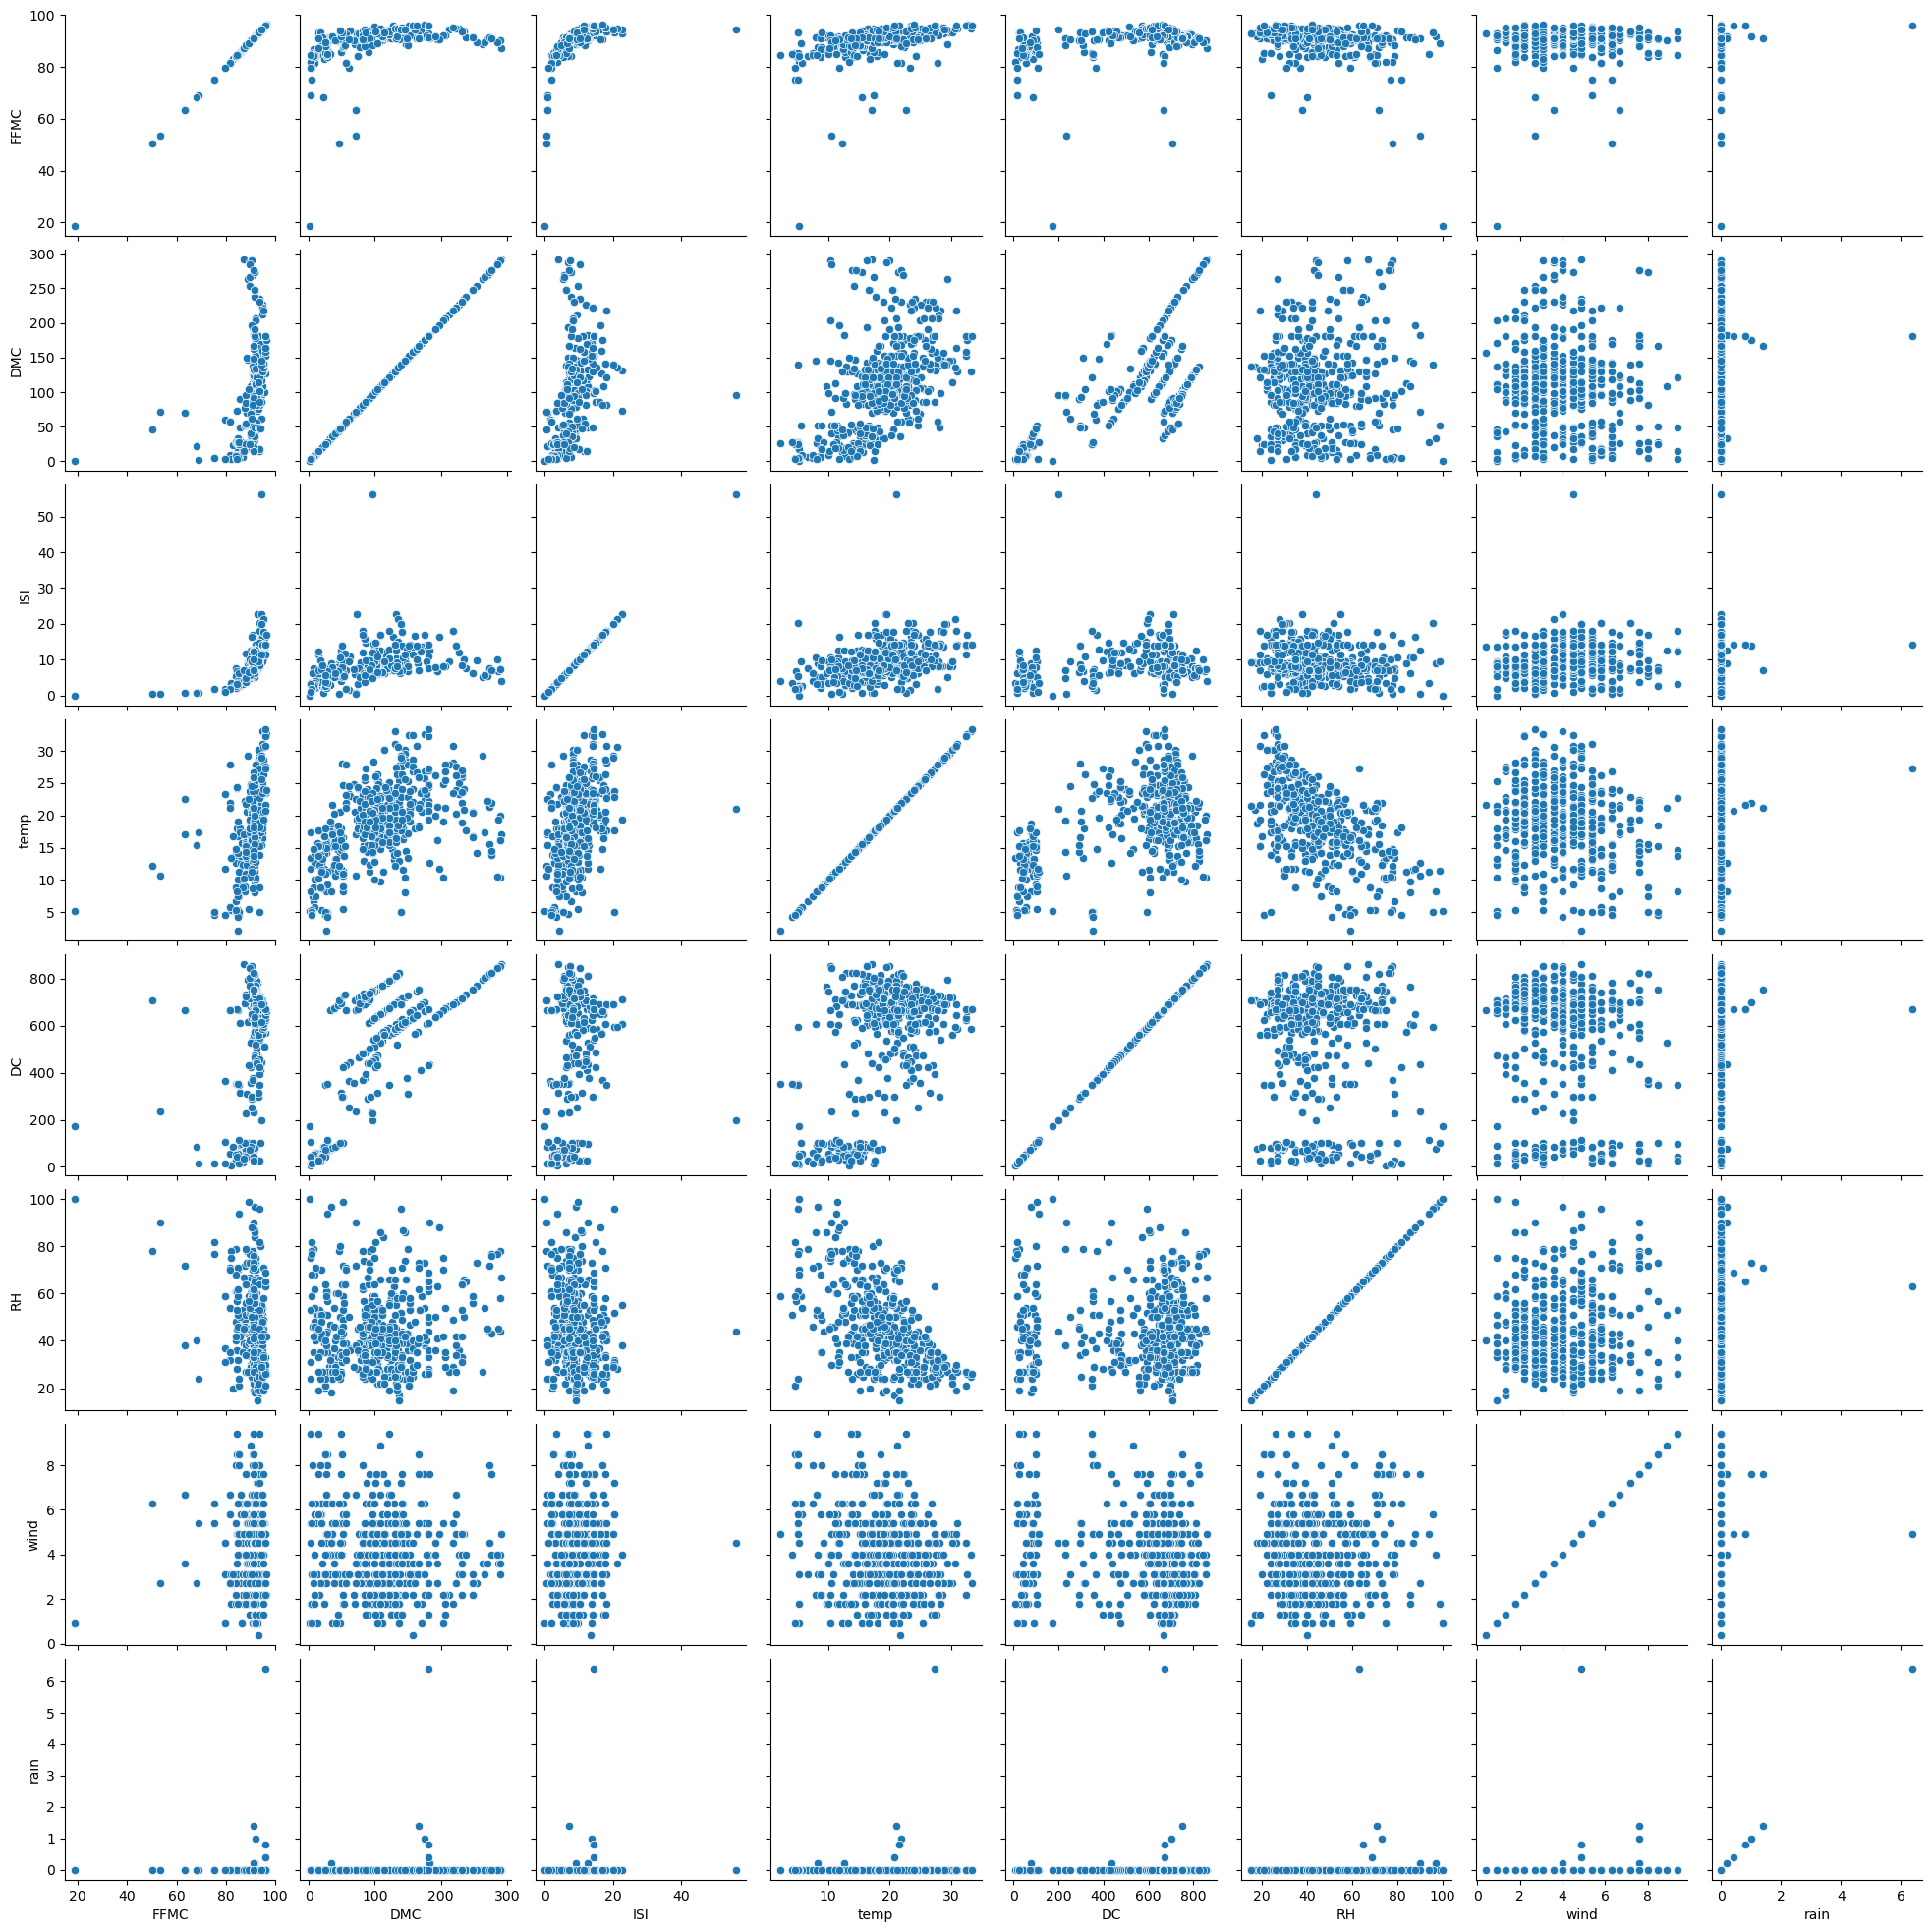

In [172]:
sns.pairplot(df[selected_columns], diag_kind=None)
plt.show()

#### Conclusion & Evaluation

**Dựa vào correlation matrix ta thấy:**   
Hệ số tương quan giữa cột `DMC` và `DC` là 0.682192  
=> 2 thuộc tính này colinear   
=> cần bỏ 1 trong 2  

In [ ]:
# Reuse code in assignment 1 for data loading, preprocessing, spliting

df = pd.read_csv("./dataset/forestfires.csv")

df["month"] = df["month"].apply(convert_month)
df["day"] = df["day"].apply(convert_day)

X_train, X_test, y_train, y_test = split_data(df)

In [198]:
# Loại bỏ cột DMC
df_reduced = df.drop(columns=["DMC"])

In [ ]:
# Đánh giá lại mô hình
lr_3 = LinearRegression()

lr_3.fit(X_train.astype(float), y_train.astype(float))

y_pred_3 = lr_3.predict(X_test.astype(float))

print(f'RMSE: { lr_3.rmse(y_test, y_pred_3) }')

RMSE: 24.069517320885986


In [200]:
# So sánh với Baseline

rmse_1 = lr.rmse(y_test, y_pred)
rmse_3 = lr_2.rmse(y_test, y_pred_3)

improvement = (rmse_1 - rmse_3) / rmse_1 * 100

print(f'RMSE of Baseline Model: {rmse_1:.4f}')
print(f'RMSE of Stadardized Model: {rmse_3:.4f}')
print(f'Improvement: {improvement:.2f}%')

RMSE of Baseline Model: 24.5784
RMSE of Stadardized Model: 24.0695
Improvement: 2.07%


#### On the Problem of Colinearity

As stated previously, the OLS of the linear regression model is achieved by assuming that $rank(X) = K$ or $det(X) \ne 0$. So that removing columns in $X$ having colinearity with other columns is to ensure that assumption of the full rank condition of $X$. In the case $det(X) = 0$, then the **Moore-Penrose inverse** will be applied to determine the pseudo-inverse matrix of $X^T X$.

## Assignment 4 (2 scores):

- Implement the Linear Regression model using Machine Learning libraries (Scikit Learn or SKorch).
- Compare the results of Linear Regression model constructed manually and from Machine Learning libraries.

In [229]:
# Reuse code in assignment 1 for data loading, preprocessing, spliting

df = pd.read_csv("./dataset/forestfires.csv")

df["month"] = df["month"].apply(convert_month)
df["day"] = df["day"].apply(convert_day)

X_train, X_test, y_train, y_test = split_data(df)

In [230]:
# Implement with Scikit Learn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

model.fit(X_train.astype(float), y_train.astype(float))

y_pred_sci = model.predict(X_test.astype(float))

rmse_sci = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse_sci:.4f}")

RMSE: 24.5784
